In [1]:
!pip install scikit-image

In [2]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  skimage import io
import os
import glob
import random
import tensorflow as tf
from tensorflow import keras

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Install the Kaggle package
!pip install kaggle

# Create a directory for the Kaggle API credentials
!mkdir -p ~/.kaggle

# Copy the kaggle.json file into the Kaggle directory
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file to be readable
!chmod 600 ~/.kaggle/kaggle.json

# Verify that the Kaggle setup works
!kaggle datasets list


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
# Download a specific dataset
!kaggle datasets download -d alxmamaev/flowers-recognition

# Unzip the downloaded dataset
!unzip flowers-recognition.zip
!rm flowers-recognition.zip





Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 98% 220M/225M [00:05<00:00, 39.0MB/s]
100% 225M/225M [00:06<00:00, 38.8MB/s]
Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  


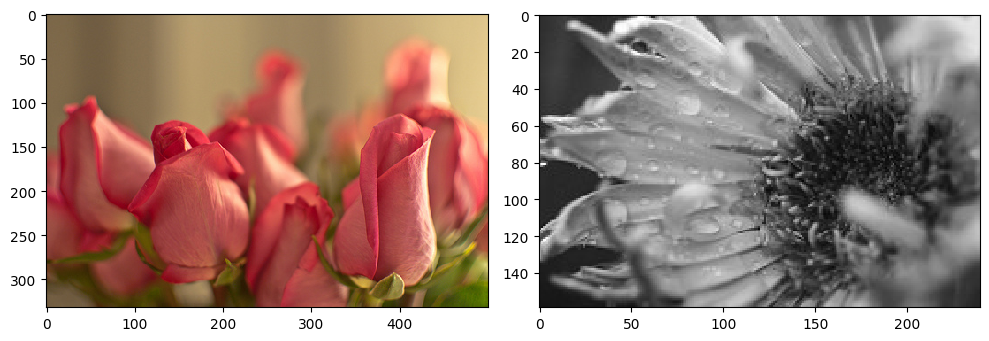

In [6]:
# Path for rose
rose_path = os.path.join('flowers', 'rose')

# Path for daisy
daisy_path = os.path.join('flowers', 'daisy')

rose_all = list(glob.glob(rose_path + '/*.jpg'))
daisy_all = list(glob.glob(daisy_path + '/*.jpg'))

fig = plt.figure(figsize=(10, 10))


# Show a random rose
fig.add_subplot(1, 2, 1)
io.imshow(io.imread(rose_all[np.random.random_integers(1,len(rose_all))]))

# Show a random daisy
fig.add_subplot(1, 2, 2)
io.imshow(io.imread(daisy_all[np.random.random_integers(1,len(daisy_all))]))
plt.show()

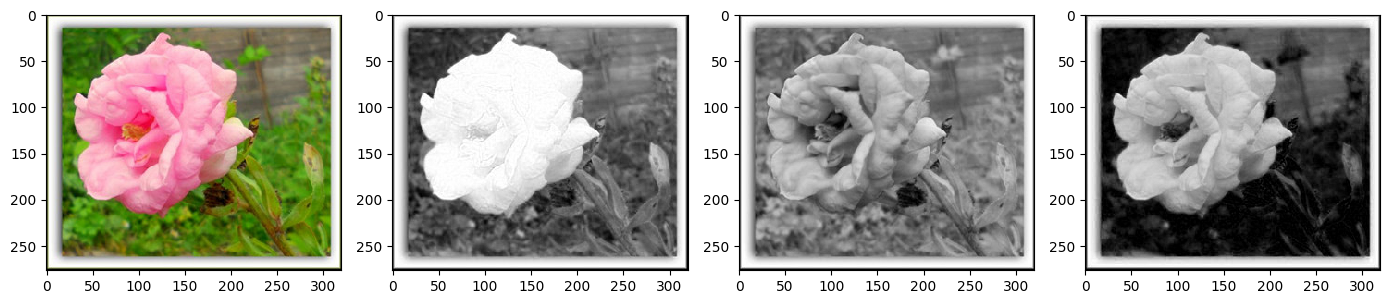

In [7]:
# Now show an original rose and then the same image in only R channel, G channel and B channel
fig = plt.figure(figsize=(14, 14))

# Capture a randon mumber
x = np.random.randint(1,len(rose_all))

# Read the image
image = io.imread(rose_all[x])

# Show original image
fig.add_subplot(1, 4, 1)
io.imshow(image)

# Show only R channel
fig.add_subplot(1, 4, 2)
io.imshow(image[:,:,0])

# Show only G channel
fig.add_subplot(1, 4, 3)
io.imshow(image[:,:,1])

# Show only B channel
fig.add_subplot(1, 4, 4)
io.imshow(image[:,:,2])

plt.show()

0.603515625


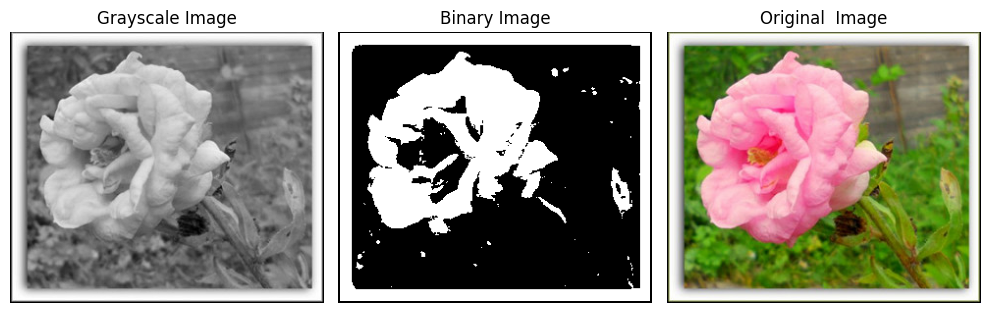

In [8]:
from skimage import color,filters
# Read the image
image = io.imread(rose_all[x])

# Convert the image to gray scale
image_gray = color.rgb2gray(image)

# Apply thresholding
threshold_value = filters.threshold_otsu(image_gray)
print(threshold_value)
binary_image = image_gray > threshold_value

# Step 4: Display the original grayscale image and the binary image
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title('Grayscale Image')
ax[0].axis('off')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title('Binary Image')
ax[1].axis('off')

ax[2].imshow(image)
ax[2].set_title('Original  Image')
ax[2].axis('off')

plt.tight_layout()
plt.show()


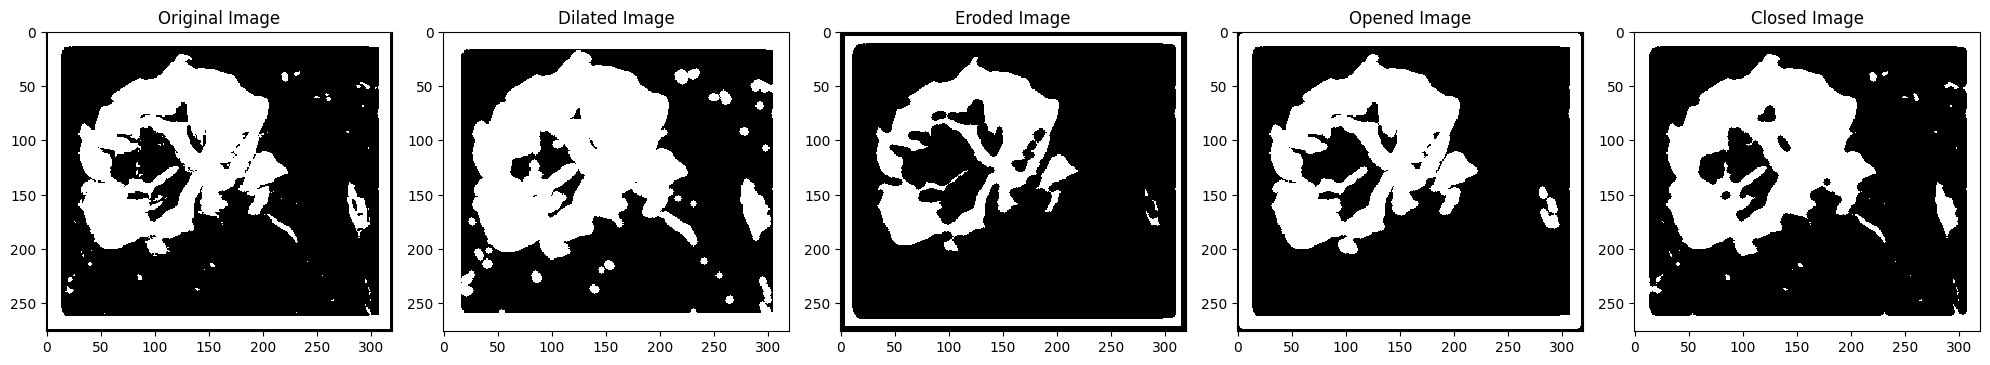

In [9]:
# Image morphing
from skimage.morphology import binary_closing, binary_erosion, binary_dilation, binary_opening, disk

# use a disk of radious 3
disk_kernel = disk(3)

# Dilation - This will increase the brighter or white spots and removes the dark splots from edges
dilated_img = binary_dilation(binary_image, disk_kernel)

# erosion - This will shrink the white spots and increases the dark spots
eroded_img = binary_erosion(binary_image, disk_kernel)

fig = plt.figure(figsize=(20,12))

fig.add_subplot(1, 5, 1).set_title('Original Image')
io.imshow(binary_image, cmap='gray')


fig.add_subplot(1, 5, 2).set_title('Dilated Image')
io.imshow(dilated_img, cmap='gray')

fig.add_subplot(1, 5, 3).set_title('Eroded Image')
io.imshow(eroded_img, cmap='gray')

# Opening - Erosion followed by dilation, so first remove the bright spots as much possible (darken the image) and then try to add white spots. Opening can open small white spots and connects small dark cracks.
opened_img = binary_opening(binary_image,disk_kernel)
fig.add_subplot(1, 5, 4).set_title('Opened Image')
io.imshow(opened_img, cmap='gray')

# Closing - Dilation follows by erosion, first increase the white spots and then add dark spots. Closing can remove small dark spots and connect small bright cracks.
closed_img = binary_closing(binary_image,disk_kernel)
fig.add_subplot(1, 5, 5).set_title('Closed Image')
io.imshow(closed_img, cmap='gray')

plt.show()

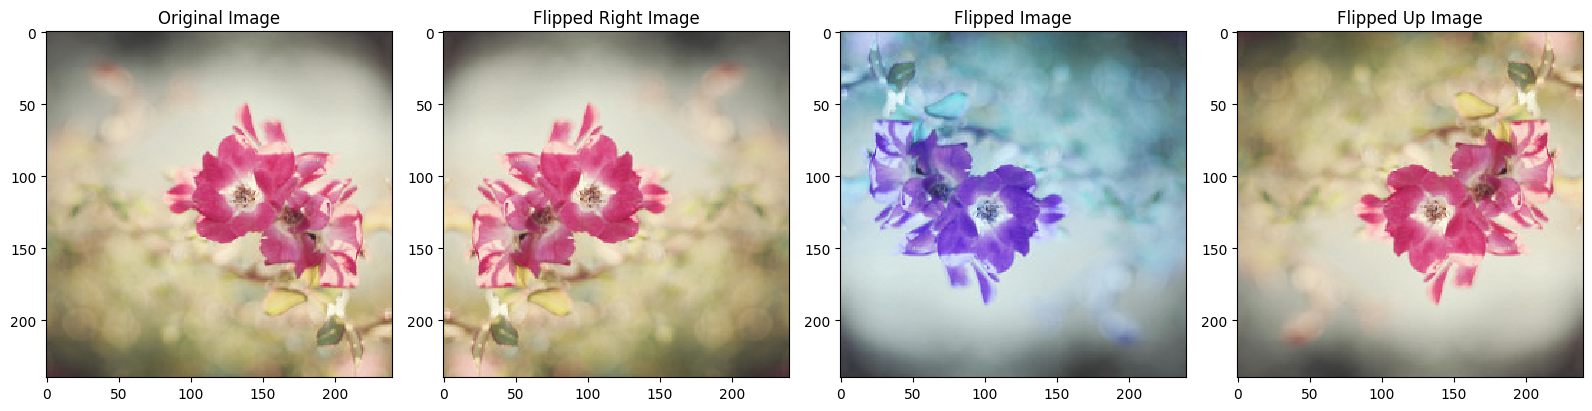

In [10]:
# Practice Augmentation
from skimage import transform as tf

fig = plt.figure(figsize=(20,12))
x = np.random.randint(1,len(rose_all))
image = io.imread(rose_all[x])

# Plot the original image
fig.add_subplot(1, 5, 1).set_title('Original Image')
io.imshow(image)

# Flipped augmented image - right flipped
image_flipr = np.fliplr(image)
fig.add_subplot(1, 5, 2).set_title('Flipped Right Image')
io.imshow(image_flipr)

# left flipped
image_flipl = np.flip(image)
fig.add_subplot(1, 5, 3).set_title('Flipped Image')
io.imshow(image_flipl)

# Upside down
image_flipud = np.flipud(image)
fig.add_subplot(1, 5, 4).set_title('Flipped Up Image')
io.imshow(image_flipud)


(159, 240, 3)
<SimilarityTransform(matrix=
    [[   1. ,   -0. ,  -79.5],
     [   0. ,    1. , -120. ],
     [   0. ,    0. ,    1. ]])>
<SimilarityTransform(matrix=
    [[  1. ,  -0. ,  79.5],
     [  0. ,   1. , 120. ],
     [  0. ,   0. ,   1. ]])>
<AffineTransform(matrix=
    [[ 0.70710678, -0.70710678,  0.        ],
     [ 0.70710678,  0.70710678,  0.        ],
     [ 0.        ,  0.        ,  1.        ]])>
<AffineTransform(matrix=
    [[ 0.25, -0.  ,  0.  ],
     [ 0.  ,  0.25,  0.  ],
     [ 0.  ,  0.  ,  1.  ]])>
<ProjectiveTransform(matrix=
    [[ 0.1767767 , -0.1767767 , 86.65945616],
     [ 0.1767767 ,  0.1767767 , 84.73304929],
     [ 0.        ,  0.        ,  1.        ]])>


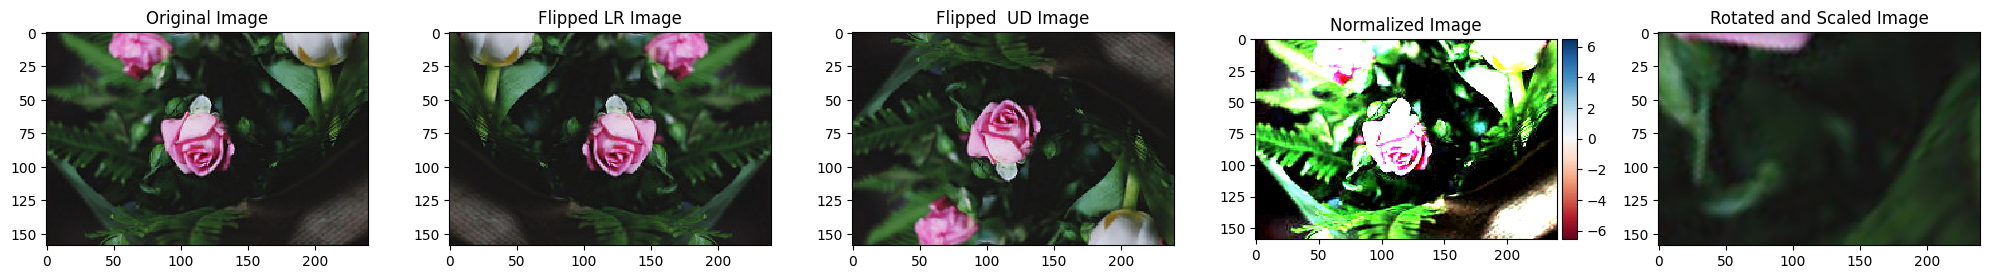

In [11]:
# Augmentation and Translation
fig = plt.figure(figsize=(20,16))
image = io.imread(rose_all[np.random.randint(1,len(rose_all))])
# Plot the origianl image
fig.add_subplot(1, 5, 1).set_title('Original Image')
io.imshow(image)

# 1. Write code to perform a left-right flip, followed by an up-down flip to the same image.
# Left Right Flip
image_left_right = np.fliplr(image)
fig.add_subplot(1, 5, 2).set_title('Flipped LR Image')
io.imshow(image_left_right)

# Upside down
image_ud = np.flipud(image)
fig.add_subplot(1, 5, 3).set_title('Flipped  UD Image')
io.imshow(image_ud)

# Normalise the image between the 25th and 75th percentiles
# pixel_min = 25 pctl
# pixel_max = 75 pctl

# 2. Norlalized image = (image - pixel_min) / (pixel_max - pixel_min)

norm_image = (image - np.percentile(image,25) ) /(np.percentile(image,75) -  np.percentile(image,25))

# Plot the normalized image
fig.add_subplot(1, 5, 4).set_title('Normalized Image')
io.imshow(norm_image)

# 3. Perform a 90-degree rotation, and follow it up with a 4x zoom-in.
print(image.shape)
# First, define the shifting transformations
shift_x,shift_y = image.shape[0]/2,image.shape[1]/2
matrix_to_topleft = tf.SimilarityTransform(translation=(-shift_x,-shift_y))
print(matrix_to_topleft)
matrix_to_center = tf.SimilarityTransform(translation = (shift_x,shift_y))
print(matrix_to_center)



#  Rotation matrix
rot_transforms = tf.AffineTransform(rotation=np.deg2rad(45))
print(rot_transforms)

# Scale Matrix
scale_transform = tf.AffineTransform(scale=(0.25, 0.25))
print(scale_transform)

# Add up the transforms
rot_plus_scale_matrix =  matrix_to_topleft + rot_transforms + scale_transform + matrix_to_center
print(rot_plus_scale_matrix)

# Apply the transformation
final_image = tf.warp(image, rot_plus_scale_matrix)

# Plot the final image
fig.add_subplot(1, 5, 5).set_title('Rotated and Scaled Image')
io.imshow(final_image)

plt.show()



In [12]:
# Train Test split using ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image_dataset_from_directory
import os

for i in os.listdir('flowers'):
  print(i,len(os.listdir(os.path.join('flowers',i))))



tulip 984
sunflower 733
daisy 764
dandelion 1052
rose 784


In [13]:
# Create an empty model
from keras.models import Sequential # Use the correct import path for the Sequential class
resnet_model = Sequential()

In [14]:
# Define some of the network parameters
img_height, img_width, batch_size = 180 ,180, 32


In [15]:
# Train And Validation Split
train_ds = image_dataset_from_directory(
    'flowers',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="categorical"
)


Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [16]:
val_ds = image_dataset_from_directory(
    'flowers',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="categorical"
)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [17]:
# Store class names and  number of classes
class_names = val_ds.class_names
print(class_names)
num_classes = len(class_names)
print(num_classes)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
5


In [18]:
# Import RESNET50

pretrained_model = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape= (img_height,img_width,3),
    pooling= 'avg',
    classes=num_classes
)

94765736/94765736 [==============================] - 3s 0us/step


In [19]:
# Ensure that the layers in the pre trained model are not trainable
for layer in pretrained_model.layers:
  layer.trainable = False

In [20]:
# Now add this pre trained model into our network
resnet_model.add(pretrained_model)

In [21]:
# Add our model dense layers

from keras.layers import Dense,Flatten
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(num_classes,activation='softmax'))


In [22]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [23]:
# Compile the model
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','AUC'])

In [ ]:
# Fit the model
history = resnet_model.fit(train_ds,validation_data=val_ds,epochs=40)

Text(0.5, 1.0, 'Loss')

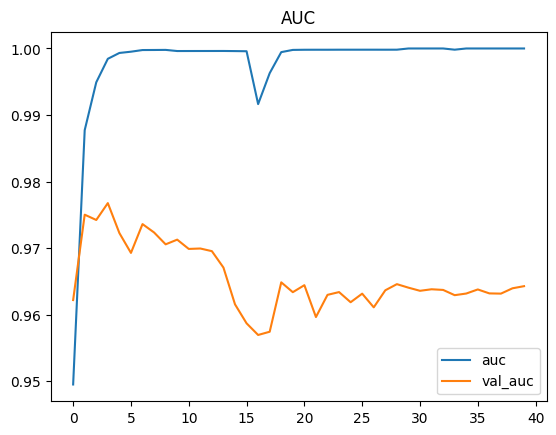

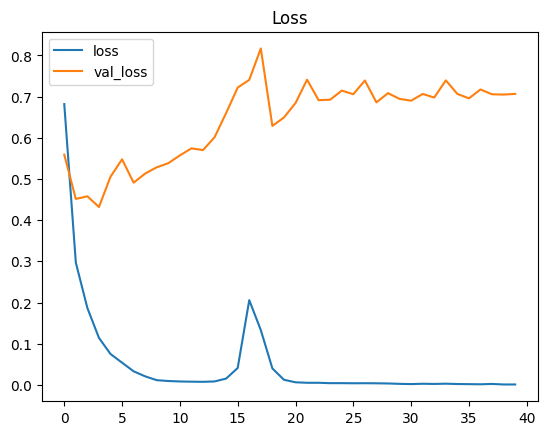

In [25]:
# Plot History
history_df = pd.DataFrame(history.history)
history_df[['auc','val_auc']].plot().set_title('AUC')
history_df[['loss','val_loss']].plot().set_title('Loss')



In [28]:
# Import CV2
import cv2

# read an image
img = cv2.imread('Daisy_1.jpg')


# Resize
test_img_scaled = cv2.resize(img, (180, 180))
test_img_scaled = np.expand_dims(test_img_scaled, axis=0)
print(test_img_scaled.shape)

(1, 180, 180, 3)


In [29]:
# Make a prediction
prediction = resnet_model.predict(test_img_scaled)
print(prediction)
class_names[np.argmax(prediction)]

1/1 [==============================] - 2s 2s/step
[[1.0000000e+00 9.2710076e-12 1.9491765e-17 5.4298818e-15 1.6388828e-15]]


'daisy'